In [26]:
import numpy as np
from comet_ml import Experiment
import json
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import (feature, filters, measure, morphology, segmentation, util, io)
from skimage.color import rgb2gray, label2rgb

In [4]:
# with open('../data/raw/comet_creds.json') as f:
#     comet_creds = json.load(f)

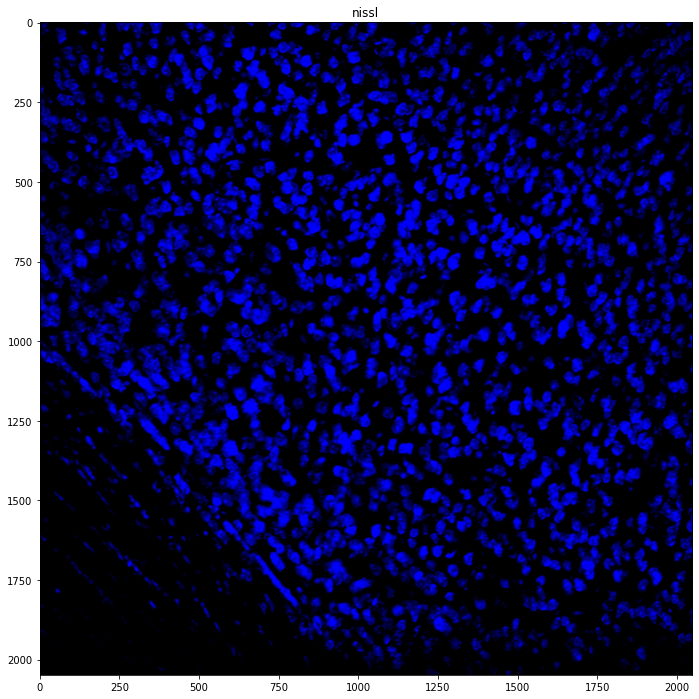

In [7]:
image = io.imread('../data/raw/0104_p301s_nissl.jpg') 
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.imshow(image, cmap='gray')
ax.set_title('nissl')
plt.show()

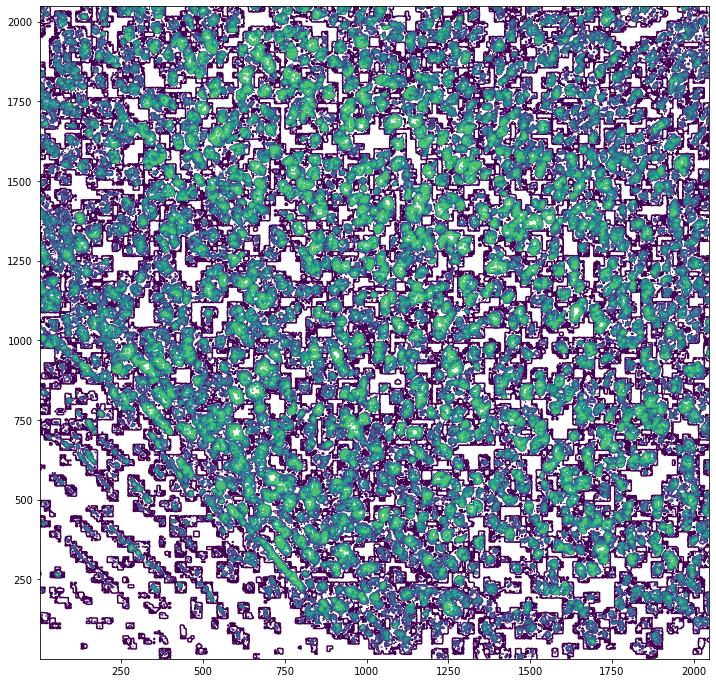

In [15]:
image_gray = rgb2gray(image)
fig, ax = plt.subplots(figsize=(12,12))
contours = ax.contour(image_gray, origin='image')
plt.show()

In [16]:
contours.levels

array([0.   , 0.015, 0.03 , 0.045, 0.06 , 0.075, 0.09 , 0.105])

In [17]:
[len(seg) for seg in contours.allsegs]

[28054, 4323, 5831, 6137, 5391, 9785, 59, 0]

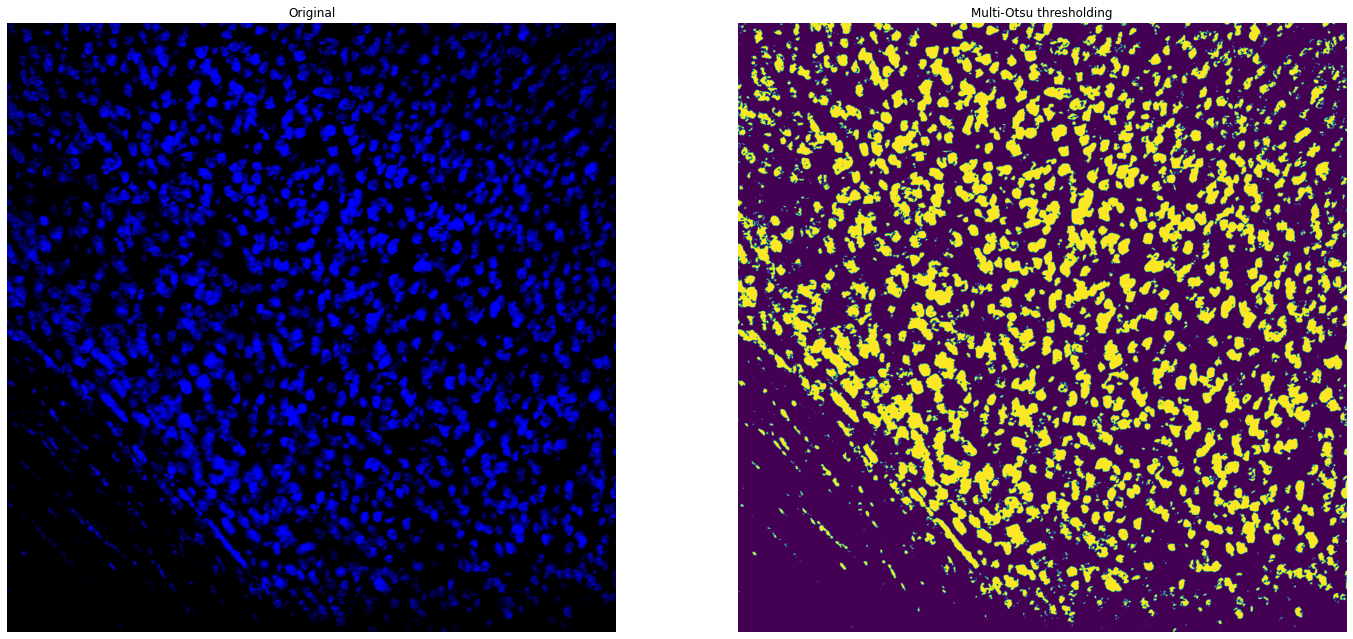

In [19]:
# use filters.threshold_multiotsu to define the threshold between cell and background
thresholds = filters.threshold_multiotsu(image_gray, classes=2)
# find out which pixels belongs to a cell (1), and whic pixel belongs to the background (0) to segment
regions = np.digitize(image_gray, bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(24, 12))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

In [25]:
cells = image_gray > thresholds[0]
background = image_gray <= thresholds[0]
labeled_cells = measure.label(cells)
print(labeled_cells.max())

3839


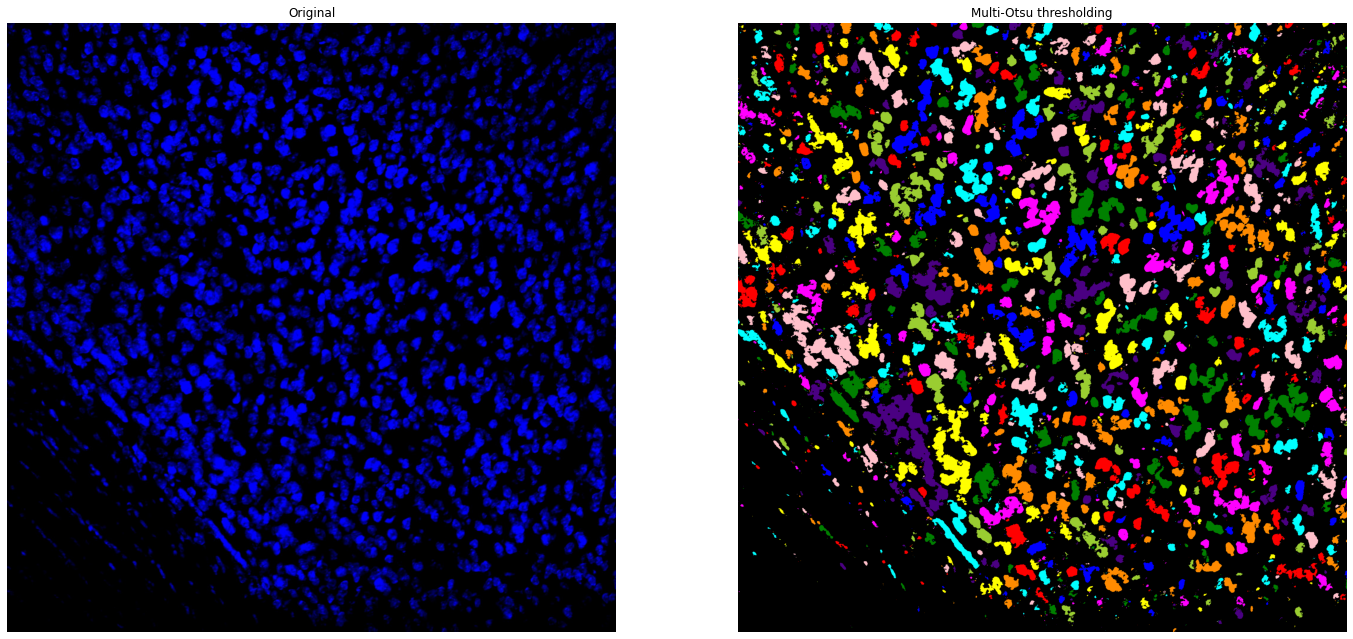

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 12))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(label2rgb(labeled_cells, bg_label=0))
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

In [ ]:
# for i in range(len(clf.cv_results_['params'])):
#     exp = Experiment(api_key=comet_cred["api_key"],
#                      workspace=comet_cred["workspace"],
#                      project_name=["project_name"])
#     for k,v in clf.cv_results_.items():
#         if k == "params":
#             exp.log_parameters(v[i])
#         else:
#             exp.log_metric(k,v[i])
            

In [ ]:
# dump(model_name, 'baseline.pkl')